# 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# 1. File Loading -File Loading

In [3]:
file_names = ['WineDotCom.csv']

In [4]:
def load_data(file_names):
    df_dict = {}
    for f in file_names:
        key = f.split('.')[0]
        df_dict[key] = pd.read_csv(f, encoding='latin-1')
    return df_dict

In [195]:
df_dict = load_data(file_names)

# 2. Statistical Analysis

In [6]:
def get_groupby_counts(df, groups):
    result = df.groupby(groups).count()
    return result

In [7]:
def drop_columns(df, column_names):
    df = df.drop(column_names, axis = 1)
    return df

## Varietal & Taste Analysis - Linqi

In [225]:
df = drop_columns(df_dict['WineDotCom'], ['Shopping_Link','Img_src'])
result_varietal = get_groupby_counts(df, ['Varietal'])
result_varietal

,Unnamed: 0,Title,Year,Price,Region,Country,Score_WS,Score_RP,Score_W&S,Score_JH,...,Score_BH,Score_JS,Score_TP,Score_D,Score_V,Score_JD,ProfessionalRating,Professional,StarRating,numRater
Varietal,,,,,,,,,,,,,,,,,,,,,
Aglianico,21,21,21,21,12,21,7,2,0,0,...,0,2,0,0,0,0,21,0,21,21
Albarino,77,77,77,77,69,77,2,9,0,0,...,0,4,0,1,0,1,77,0,77,77
Aligote,2,2,2,2,2,2,0,0,0,0,...,0,0,0,0,0,0,2,0,2,2
Arneis,21,21,21,21,21,21,3,3,0,0,...,0,0,0,0,1,0,21,0,21,21
Assyrtiko,7,7,7,7,7,7,0,1,0,0,...,0,0,0,0,0,0,7,0,7,7
Barbera,71,71,71,71,67,71,10,4,0,0,...,0,9,0,0,3,0,71,0,71,71
Bonarda,17,17,17,17,15,17,0,2,0,0,...,0,1,1,0,0,0,17,0,17,17
Bordeaux Red Blends,1179,1179,1178,1179,1145,1179,586,780,0,2,...,0,702,13,371,146,256,1179,0,1179,1179
Bordeaux White Blends,72,72,72,72,67,72,19,35,0,1,...,0,39,0,24,7,13,72,0,72,72


In [9]:
#Cross Tab Varietal VS Country
pd.crosstab(df.Varietal, df.Country, margins=True)
type(pd.crosstab(df.Varietal, df.Country, margins=True))

pandas.core.frame.DataFrame

In [10]:
pd.crosstab(df.Varietal, df.Year, margins=True)
type(pd.crosstab(df.Varietal, df.Year, margins=True))

pandas.core.frame.DataFrame

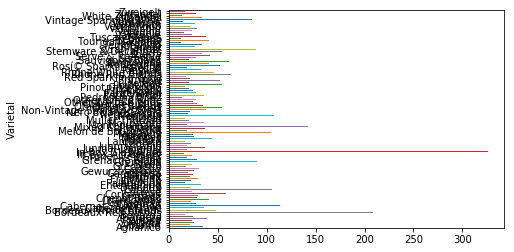

In [64]:
varietal_price = df.groupby(['Varietal']).Price.mean()
type(varietal_price)
varietal_price.plot.barh()

## Year Analysis -Zhang Chi

## Region & Country Analysis - Zhang Chi

## Professional Ratings Analysis - Jiaxin

# ----------------------------------------------------------------------------

In [360]:
#professional ratings Crosstab
import numpy as np
import pandas as pd
df = drop_columns(df_dict['WineDotCom'], ['Shopping_Link','Img_src'])
df = df[df["ProfessionalRating"] > 0]
pd.crosstab(df.ProfessionalRating, df.Country, margins = True)

In [359]:
#buyer ratings Crosstab
df = drop_columns(df_dict['WineDotCom'], ['Shopping_Link','Img_src'])
df = df[df["StarRating"] > 0]
pd.crosstab(df.StarRating, df.Varietal, margins = True)

In [346]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Professional Rating analysis
df = drop_columns(df_dict['WineDotCom'], ['Shopping_Link','Img_src'])
df = df[df["ProfessionalRating"] > 0]
result_professional_rating = get_groupby_counts(df, ['ProfessionalRating'])
rating_describe = df.groupby(['ProfessionalRating']).Price.describe()

In [ ]:
#Professional Rating plots
professional_rating_price = df.groupby(['ProfessionalRating']).Price.count()
professional_rating_price.plot.bar()

In [ ]:
professional_rating_price = df.groupby(['ProfessionalRating']).Price.mean()
professional_rating_price.plot.bar()

In [347]:
#Buyer Rating analysis
df = drop_columns(df_dict['WineDotCom'], ['Shopping_Link','Img_src'])
df = df[df["StarRating"] > 0]
result_star_rating = get_groupby_counts(df, ['StarRating'])
rating_describe = df.groupby(['StarRating'])

In [ ]:
#Buyer Rating plots
star_rating_price = df.groupby(['StarRating']).Price.count()
star_rating_price.plot.bar()

In [ ]:
star_rating_price = df.groupby(['StarRating']).Price.mean()
star_rating_price.plot.bar()

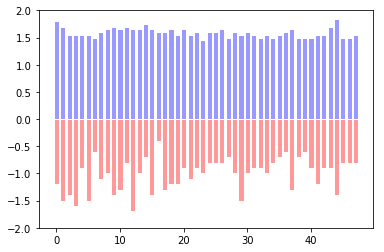

In [362]:
#Professional & Buyers comparison
df = drop_columns(df_dict['WineDotCom'], ['Shopping_Link','Img_src'])
df = df[df["StarRating"] > 0]
df = df[df["ProfessionalRating"] > 0]
df = df[df["numRater"] > 100]
df

professional_rating = df["ProfessionalRating"]
buyer_rating = df["StarRating"]

n = 48
X = np.arange(n)
Y1 = professional_rating/20-3
Y2 = buyer_rating-3

plt.bar(X, +Y1, facecolor='#9999ff', edgecolor='white')
plt.bar(X, -Y2, facecolor='#ff9999', edgecolor='white')

plt.ylim(-2,+2)
plt.show()

# -------------------------------------------------------

In [338]:
df = drop_columns(df_dict['WineDotCom'], ['Shopping_Link','Img_src'])
df = df[df["ProfessionalRating"] > 0]
df
result_professional_rating = get_groupby_counts(df, ['ProfessionalRating'])
result_professional_rating

,Unnamed: 0,Title,Year,Varietal,Price,Region,Country,Score_WS,Score_RP,Score_W&S,...,Score_WW,Score_BH,Score_JS,Score_TP,Score_D,Score_V,Score_JD,Professional,StarRating,numRater
ProfessionalRating,,,,,,,,,,,,,,,,,,,,,
88,33,33,30,33,33,18,33,11,2,0,...,11,0,2,2,0,0,1,0,33,33
89,409,409,378,409,409,314,409,74,46,0,...,215,1,13,2,3,0,0,0,409,409
90,1255,1255,1147,1255,1255,1072,1255,319,324,0,...,175,14,158,41,26,32,24,0,1255,1255
91,1414,1414,1273,1414,1414,1268,1414,491,512,0,...,221,28,353,40,49,52,51,0,1414,1414
92,1419,1419,1342,1419,1419,1327,1419,490,598,0,...,193,39,506,47,94,136,100,0,1419,1419
93,1085,1085,1048,1085,1085,1019,1085,445,567,0,...,114,23,431,32,120,115,91,0,1085,1085
94,641,641,623,641,641,607,641,292,426,0,...,59,16,275,12,79,101,71,0,641,641
95,470,470,458,470,470,442,470,240,335,0,...,18,7,199,6,87,76,89,0,470,470
96,294,294,294,294,294,286,294,190,247,0,...,9,2,171,0,80,50,69,0,294,294


In [339]:
rating_describe = df.groupby(['ProfessionalRating']).Price.describe()
rating_describe

,count,mean,std,min,25%,50%,75%,max
ProfessionalRating,,,,,,,,
88,33.0,19.836667,35.005136,7.99,9.990,10.990,12.9900,179.97
89,409.0,17.676724,5.467126,6.97,13.990,17.990,19.9900,69.97
90,1255.0,34.211849,33.312052,0.00,17.990,24.990,38.9900,439.97
91,1414.0,45.926259,55.749270,8.98,22.990,32.990,51.9900,1149.97
92,1419.0,54.459718,57.021244,9.97,27.990,41.970,59.9900,779.97
93,1085.0,75.496230,71.704932,10.99,37.990,55.990,84.9900,874.97
94,641.0,126.209095,186.283679,12.97,49.980,79.970,139.9900,2799.97
95,470.0,184.417830,234.069683,11.99,69.990,117.480,199.9700,2399.99
96,294.0,292.819694,531.175566,19.99,99.990,174.980,317.4700,5499.97


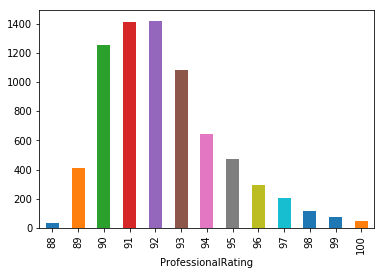

In [213]:
professional_rating_price = df.groupby(['ProfessionalRating']).Price.count()
professional_rating_price.plot.bar()

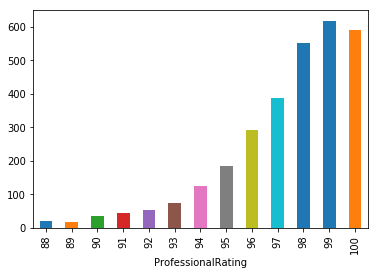

In [340]:
professional_rating_price = df.groupby(['ProfessionalRating']).Price.mean()
professional_rating_price.plot.bar()

## Buyers Ratings Analysis - Jiaxin

In [203]:
df = drop_columns(df_dict['WineDotCom'], ['Shopping_Link','Img_src'])
df = df[df["StarRating"] > 0]
df
result_star_rating = get_groupby_counts(df, ['StarRating'])
result_star_rating

,Unnamed: 0,Title,Year,Varietal,Price,Region,Country,Score_WS,Score_RP,Score_W&S,...,Score_WW,Score_BH,Score_JS,Score_TP,Score_D,Score_V,Score_JD,ProfessionalRating,Professional,numRater
StarRating,,,,,,,,,,,,,,,,,,,,,
2.1,1,1,0,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,1
2.3,1,1,1,1,1,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,1
2.4,2,2,1,2,2,1,2,0,1,0,...,0,0,0,0,0,0,0,2,0,2
2.5,2,2,2,2,2,2,2,0,0,0,...,0,0,0,0,0,0,0,2,0,2
2.6,4,4,2,4,4,4,4,1,2,0,...,0,0,1,0,0,0,0,4,0,4
2.7,3,3,3,3,3,2,3,0,0,0,...,1,0,0,1,0,0,0,3,0,3
2.8,3,3,3,3,3,2,3,0,0,0,...,1,0,0,0,0,0,0,3,0,3
2.9,9,9,7,9,9,7,9,1,1,0,...,1,0,1,0,0,0,0,9,0,9
3.0,10,10,8,10,10,10,10,2,2,0,...,1,0,1,0,0,0,0,10,0,10


In [205]:
rating_describe = df.groupby(['StarRating']).Price.describe()
rating_describe

,count,mean,std,min,25%,50%,75%,max
StarRating,,,,,,,,
2.1,1.0,19.990000,NaN,19.99,19.990,19.99,19.9900,19.99
2.3,1.0,10.990000,NaN,10.99,10.990,10.99,10.9900,10.99
2.4,2.0,19.990000,4.242641,16.99,18.490,19.99,21.4900,22.99
2.5,2.0,18.490000,3.535534,15.99,17.240,18.49,19.7400,20.99
2.6,4.0,14.740000,2.986079,10.99,13.240,14.99,16.4900,17.99
2.7,3.0,14.990000,6.928203,10.99,10.990,10.99,16.9900,22.99
2.8,3.0,14.323333,5.033223,8.99,11.990,14.99,16.9900,18.99
2.9,9.0,19.545556,10.296979,8.99,9.990,13.99,26.9900,32.99
3.0,10.0,57.984000,120.716831,8.98,10.490,15.99,34.2400,399.97


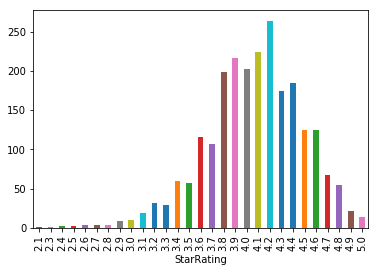

In [206]:
star_rating_price = df.groupby(['StarRating']).Price.count()
star_rating_price.plot.bar()

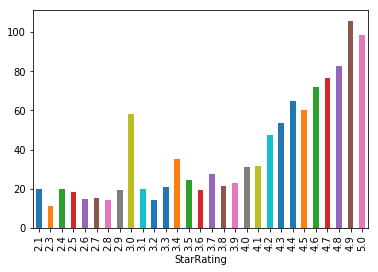

In [207]:
star_rating_price = df.groupby(['StarRating']).Price.mean()
star_rating_price.plot.bar()

In [254]:
df = drop_columns(df_dict['WineDotCom'], ['Shopping_Link','Img_src'])
df = df[df["StarRating"] > 0]
df = df[df["ProfessionalRating"] > 0]
df = df[df["numRater"] > 100]
df

,Unnamed: 0,Title,Year,Varietal,Price,Region,Country,Score_WS,Score_RP,Score_W&S,...,Score_BH,Score_JS,Score_TP,Score_D,Score_V,Score_JD,ProfessionalRating,Professional,StarRating,numRater
1,1,Dom Perignon with Gift Box 2009,2009.0,Vintage Sparkling Wine,189.97,Champagne,France,96.0,NaN,NaN,...,NaN,97.0,NaN,96.0,NaN,NaN,96,NaN,4.2,110
5,5,Silver Oak Napa Valley Cabernet Sauvignon 2013,2013.0,Cabernet Sauvignon,114.99,Napa Valley,California,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,94,NaN,4.5,102
15,15,Veuve Clicquot Yellow Label Brut,NaN,Non-Vintage Sparkling Wine,59.97,Champagne,France,90.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,91,NaN,4.4,390
22,22,Caymus Special Selection Cabernet Sauvignon 2014,2014.0,Cabernet Sauvignon,179.99,Napa Valley,California,91.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,91,NaN,4.6,143
32,32,Substance Cabernet Sauvignon 2016,2016.0,Cabernet Sauvignon,14.99,Columbia Valley,Washington,90.0,92.0,NaN,...,NaN,92.0,NaN,NaN,NaN,93.0,91,NaN,3.9,204
44,44,The Prisoner Wine Company The Prisoner 2016,2016.0,Other Red Blends,39.99,Napa Valley,California,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,91,NaN,4.5,302
51,51,Columbia Crest Grand Estates Red Blend 2012,2012.0,Other Red Blends,9.99,Columbia Valley,Washington,90.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,90,NaN,3.6,126
56,56,DAOU Vineyards Cabernet Sauvignon 2016,2016.0,Cabernet Sauvignon,25.99,Central Coast,California,NaN,94.0,NaN,...,NaN,NaN,NaN,NaN,NaN,91.0,92,NaN,4.1,135
64,64,Louis Martini Napa Valley Cabernet Sauvignon 2014,2014.0,Cabernet Sauvignon,29.99,Napa Valley,California,NaN,95.0,NaN,...,NaN,91.0,NaN,NaN,NaN,NaN,93,NaN,4.0,130
65,65,Jordan Cabernet Sauvignon 2013,2013.0,Cabernet Sauvignon,54.99,Sonoma County,California,NaN,NaN,NaN,...,NaN,NaN,95.0,NaN,NaN,NaN,94,NaN,4.4,152


In [265]:
professional_rating = df["ProfessionalRating"]
buyer_rating = df["StarRating"]

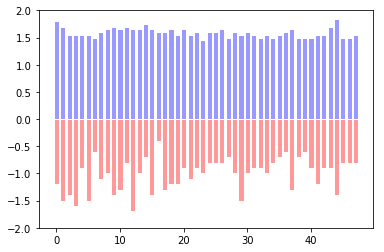

In [290]:
import numpy as np
import matplotlib.pyplot as plt


n = 48
X = np.arange(n)
Y1 = professional_rating/20-3
Y2 = buyer_rating-3

plt.bar(X, +Y1, facecolor='#9999ff', edgecolor='white')
plt.bar(X, -Y2, facecolor='#ff9999', edgecolor='white')

plt.ylim(-2,+2)
plt.show()

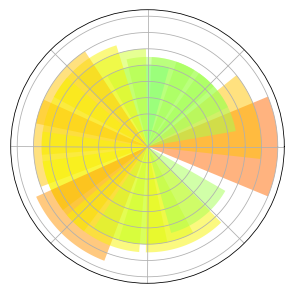

matplotlib.patches.Rectangle

In [332]:
import numpy as np
import matplotlib.pyplot as plt

ax = plt.axes([0.025,0.025,0.95,0.95], polar=True)

N = 20
theta = np.arange(0.0, 1.8*np.pi, 1.8*np.pi/N)
radii = 10*(professional_rating[:20] / 20 - 4)
width = np.pi/4*np.ones(N)
bars = plt.bar(theta, radii, width=width, bottom=0.0)

for r,bar in zip(radii, bars):
    bar.set_facecolor(plt.cm.jet(r/10.))
    bar.set_alpha(0.5)

ax.set_xticklabels([])
ax.set_yticklabels([])
# savefig('../figures/polar_ex.png',dpi=48)
plt.show()
type(bar)

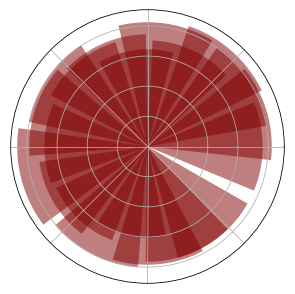

matplotlib.patches.Rectangle

In [335]:
import numpy as np
import matplotlib.pyplot as plt

ax = plt.axes([0.025,0.025,0.95,0.95], polar=True)

N = 20
theta = np.arange(0.0, 1.8*np.pi, 1.8*np.pi/N)
radii = 10*buyer_rating[:20] - 3.8
width = np.pi/4*np.ones(N)
bars = plt.bar(theta, radii, width=width, bottom=0.0)

for r,bar in zip(radii, bars):
    bar.set_facecolor(plt.cm.jet(r/10.))
    bar.set_alpha(0.5)

ax.set_xticklabels([])
ax.set_yticklabels([])
# savefig('../figures/polar_ex.png',dpi=48)
plt.show()
type(bar)

# 3. Introduction

In [96]:
#View description of varietal
all_files = os.listdir("Varietal/") #suppose you are one directory above test dir
print(all_files)
txt_files = filter(lambda x: x[-4:] == '.txt', all_files) #filter out all the text files 
print(txt_files)
varietal_files = list(txt_files)

['Sherry.txt', 'Semillon.txt', 'Arneis.txt']


In [97]:
varietal_files

['Sherry.txt', 'Semillon.txt', 'Arneis.txt']

In [98]:
os.chdir("Varietal/")
varietal_intro = {}
for f in varietal_files :
    with open(f, 'r') as file:
        varietal_intro[f] = file.read()

In [99]:
varietal_intro['Sherry.txt']

'Dessert, Sherry & Port\nEnd a great meal on a sweet note, dessert and fortified wines come in an impressive array of styles and sweetness levels. Many wines in this category—including Port, Sherry, and Madeira—are fortified with neutral spirits to increase the level of alcohol, and, depending on the final style of wine desired, often to arrest fermentation while some (or a lot of) residual sugar remains. Others, like Sauternes and Tokaji, are produced by leaving the grapes on the vine long after the rest of the harvest has been processed in order to accumulate very high sugar levels. Often, a form of “noble” rot called botrytis plays a role, desiccating the grape until only the very flavorful solids and sugars remain. These late-picked wines are, accordingly, often referred to as late-harvest wines. In colder climates, the grapes may be allowed to freeze on the vine for the production of ice wine. '

In [100]:
os.chdir("..") #move up one directory

# 4. Recommendation System

## Recommend Products based on Users' prefernces

In [26]:
#Features that users can select
title = ''
varietal = ''
startYr = 0
endYr = 2018
taste = ''
region = ''
country = ''
starPrice = 0
endPrice = 100000000

In [27]:
#Select based on title

In [28]:
#Select based on varietal
varietal = 'Cabernet Sauvignon'
df = df_dict['WineDotCom']
expression = 'Varietal' + '==' + varietal
#condition = df_dict['WineDotCom'].eval(expression)
#condition = pd.eval(df_dict['WineDotCom'].Varietal == 'Cabernet Sauvignon')
condition = df.eval(expression)
#result = 

SyntaxError: invalid syntax (<unknown>, line 1)

## Recommend Similar Items

# 5.Spyre

In [108]:
from spyre import server
class SimpleApp(server.App):
    title = "Simple App"

app = SimpleApp()
if __name__ == '__main__':
    app.launch()

AttributeError: module '__main__' has no attribute '__file__'